In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display all columns
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")

# Preview the data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Shape and data types
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary statistics
df.describe()

# Null values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1470, 35)

Data Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLeve

C:\Users\Pratik\AppData\Local\Temp\ipykernel_23704\1549368105.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


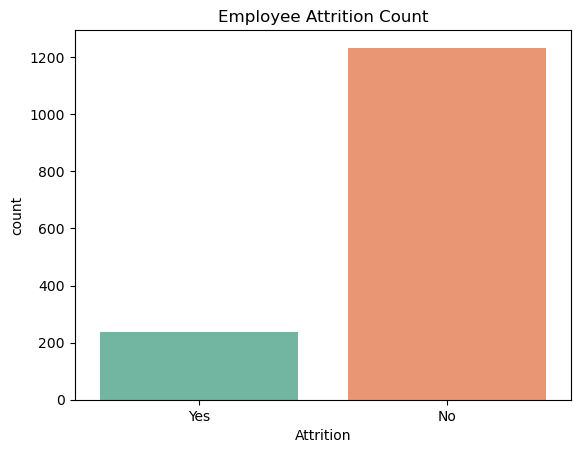

In [7]:
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Employee Attrition Count")
plt.show()


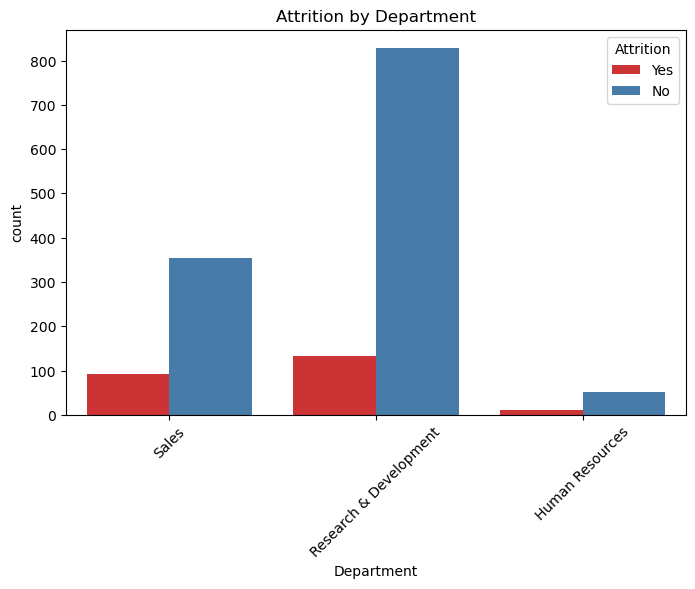

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='Set1')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


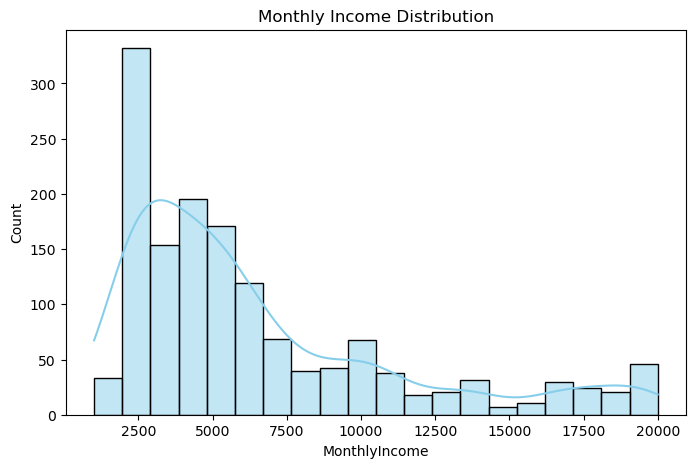

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyIncome'], kde=True, color='skyblue')
plt.title("Monthly Income Distribution")
plt.show()


C:\Users\Pratik\AppData\Local\Temp\ipykernel_23704\3172378335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='coolwarm')


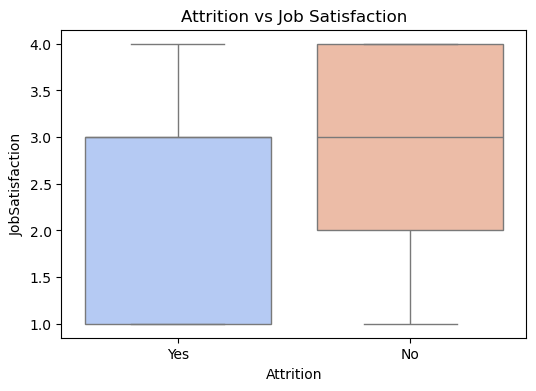

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='coolwarm')
plt.title("Attrition vs Job Satisfaction")
plt.show()


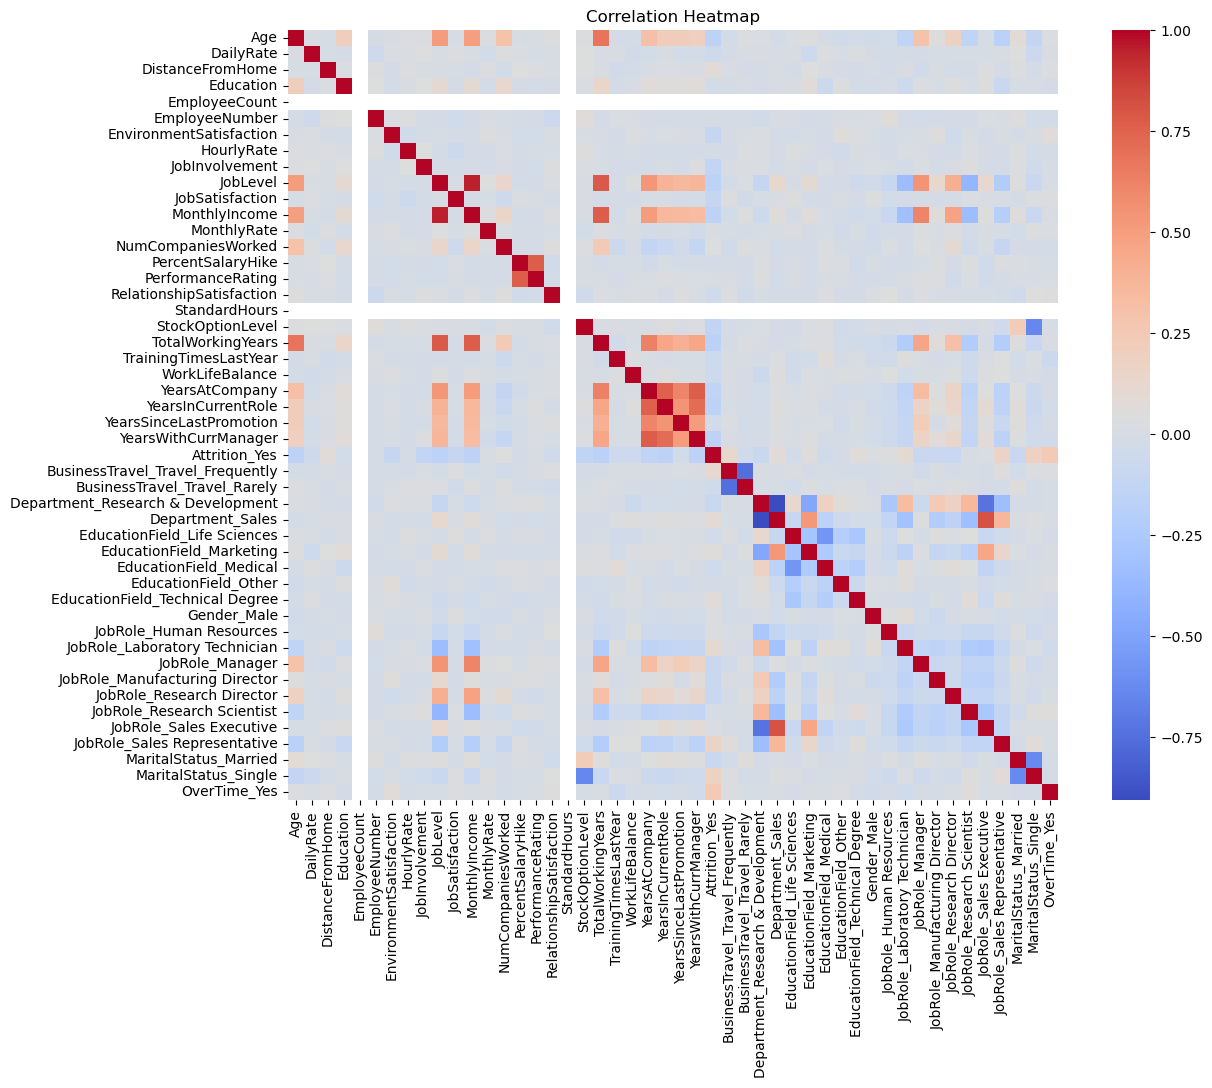

In [15]:
# Convert categorical columns to numeric for correlation
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


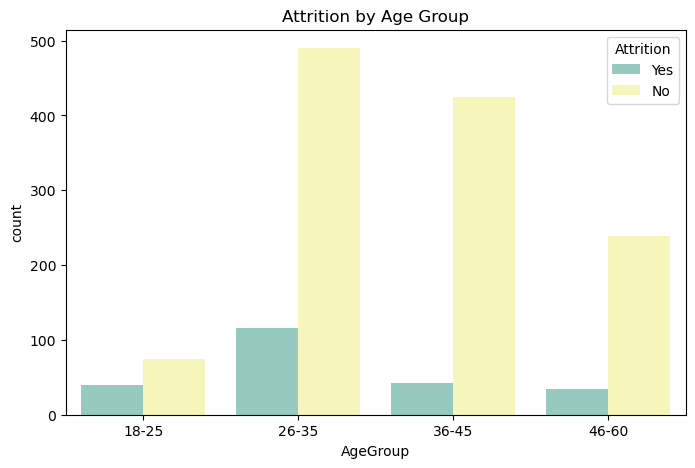

In [17]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Attrition', data=df, palette='Set3')
plt.title("Attrition by Age Group")
plt.show()


In [19]:
# Save to CSV for Power BI usage
df.to_csv("HR_Analytics_Cleaned.csv", index=False)
